# Part 1: Feed forward network (multilayer perceptron)

Here the complete training and evaluation pipeline for a fully connected feed forward network is developed.
This covers all the stages, starting from data preparation and finishing with model evaluation. We use the full functionality of PyTorch and all its packages.

The training function and other helper functions are defined in the scripts/model_pipeline.py file.

We use this framework to train 3 feed-forward neural networks and compare their performance:
- first, we use only linear layers and non-linearites of your choice.
- second, we use linear layers, non-linearities and drop-out
- third, we use linear layers, non-linearities,  drop-out and batch norm


### Model training and evaluation

We define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data. The function is flexible and it can take in all necessary hyper-parameters for the training.

The `mlp_train` function shall returns 
* the trained model `mlp_model`
* losses and accuracies for monitoring purposes

**Test Accuracy with Best MLP Model: 89.2%**

In [42]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from scripts.model_pipeline import mlp_train, loss_plot, mlp_apply

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Non-Linear Model with 3 Hidden Layers and Relu
- Linear layers
- Relu Non-linearity
- Optimiser: Script code can handle 3 optimisers: 'SGD' 'Adam' or 'RMSProp'

In [43]:
#Call function mlp_train so that it can be run from this cell
from scripts.model_pipeline import mlp_train, loss_plot, mlp_apply

#Parameters
in_features = 28*28    #(1 x 28 x 28 images)
out_features = 10    #10 classes
n_epochs = 20
batch_size = 128
lr = 0.1
momentum = 0
optimizer='SGD'   #Can be 'SGD' or 'Adam' or 'RMSProp'
model_type = 'ANN'

#Linear Model with 3 hidden layers
model = nn.Sequential(
    nn.Linear(28*28,512),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.Linear(100,10)
)

#Data
trainset = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)
testset = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)

# train and evaluate mlp_model
mlp_model1, train_losses1, test_losses1, train_accuracy1, test_accuracy1 = mlp_train(model, model_type, trainset, 
                                                                                     testset, in_features, 
                                                                                     n_epochs=n_epochs, 
                                                                                     batch_size=batch_size, 
                                                                                     optimizer_param=optimizer, 
                                                                                     optimizer_lr=lr, 
                                                                                     momentum=momentum)
# model: untrained model

print(mlp_model1)

Epoch 1/20, Train Loss: 0.9533, Train Accuracy: 64.8193, Test Loss: 0.5862, Test Accuracy: 78.5898
Epoch 2/20, Train Loss: 0.5147, Train Accuracy: 81.1406, Test Loss: 0.4852, Test Accuracy: 82.2290
Epoch 3/20, Train Loss: 0.4363, Train Accuracy: 84.0269, Test Loss: 0.4549, Test Accuracy: 82.7729
Epoch 4/20, Train Loss: 0.3986, Train Accuracy: 85.3700, Test Loss: 0.4234, Test Accuracy: 84.6915
Epoch 5/20, Train Loss: 0.3729, Train Accuracy: 86.2029, Test Loss: 0.3885, Test Accuracy: 85.6804
Epoch 6/20, Train Loss: 0.3500, Train Accuracy: 87.0813, Test Loss: 0.3807, Test Accuracy: 86.0265
Epoch 7/20, Train Loss: 0.3351, Train Accuracy: 87.6610, Test Loss: 0.3633, Test Accuracy: 86.9066
Epoch 8/20, Train Loss: 0.3213, Train Accuracy: 88.0902, Test Loss: 0.3963, Test Accuracy: 85.3639
Epoch 9/20, Train Loss: 0.3065, Train Accuracy: 88.5506, Test Loss: 0.3833, Test Accuracy: 86.1056
Epoch 10/20, Train Loss: 0.2952, Train Accuracy: 88.9703, Test Loss: 0.3589, Test Accuracy: 86.7880
Epoch 11/

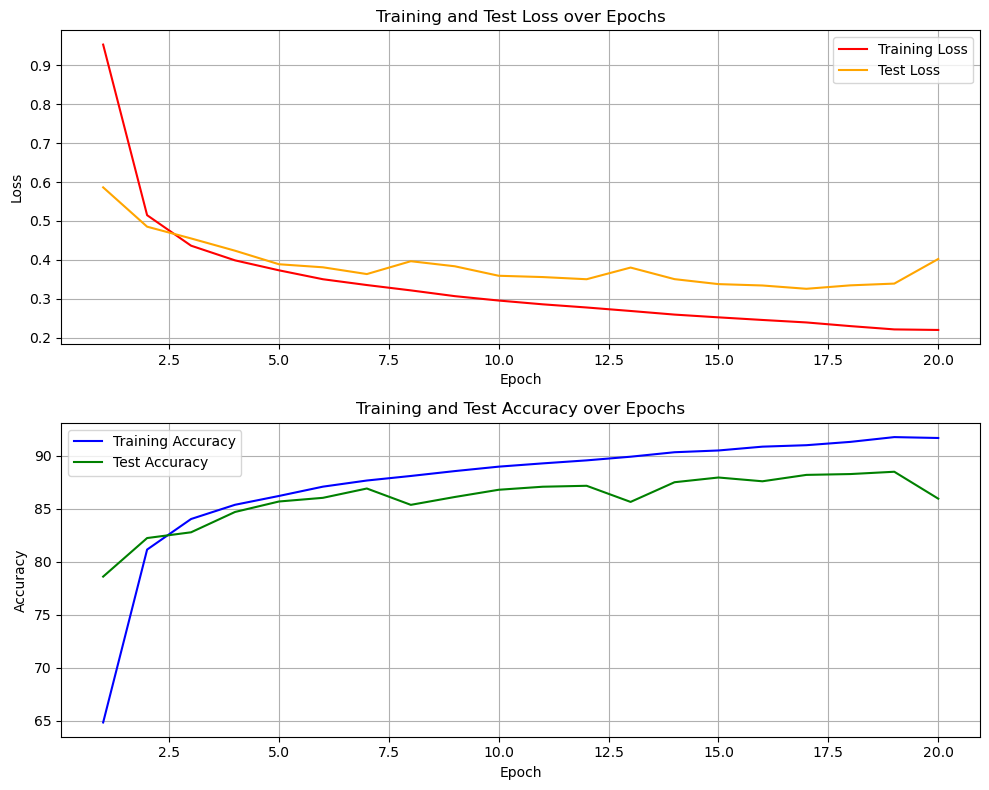

In [50]:
loss_plot(train_losses1,test_losses1,train_accuracy1,test_accuracy1,n_epochs)

### 2. Non-Linear Model with 2 Hidden layers, ReLU and Dropout
- Linear Layers
- ReLU Non-Linearity
- Dropout
- Optimiser: Script code can handle 3 optimisers: 'SGD' 'Adam' or 'RMSProp'

In [4]:
#Parameters
in_features = 784    #(1 x 28 x 28 images)
out_features = 10    #10 classes
n_epochs = 20
batch_size = 128
lr = 0.1
momentum = 0.9   #only for SGD
optimizer='SGD'  #Can be 'SGD' or 'Adam' or 'RMSProp'
model_type = 'ANN'

#Linear Model with 1 hidden layers
model = nn.Sequential(
    nn.Linear(28*28,512),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(512,10)
)

#Data
trainset = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)
testset = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)

# train and evaluate mlp_model
mlp_model2, train_losses2, test_losses2, train_accuracy2, test_accuracy2 = mlp_train(model, model_type, trainset, 
                                                                                     testset, n_epochs=n_epochs, 
                                                                                     batch_size=batch_size, 
                                                                                     optimizer_param=optimizer, 
                                                                                     optimizer_lr=lr,
                                                                                     momentum=momentum)
# model: untrained model

print(mlp_model2)

Epoch 1/20, Train Loss: 0.6099, Train Accuracy: 77.7769, Test Loss: 0.4331, Test Accuracy: 84.4541
Epoch 2/20, Train Loss: 0.4571, Train Accuracy: 83.1118, Test Loss: 0.4255, Test Accuracy: 84.4541
Epoch 3/20, Train Loss: 0.4220, Train Accuracy: 84.3223, Test Loss: 0.4073, Test Accuracy: 84.4047
Epoch 4/20, Train Loss: 0.3986, Train Accuracy: 85.2401, Test Loss: 0.4109, Test Accuracy: 84.2563
Epoch 5/20, Train Loss: 0.3876, Train Accuracy: 85.6032, Test Loss: 0.4145, Test Accuracy: 84.8101
Epoch 6/20, Train Loss: 0.3762, Train Accuracy: 86.0574, Test Loss: 0.3805, Test Accuracy: 86.5111
Epoch 7/20, Train Loss: 0.3624, Train Accuracy: 86.5144, Test Loss: 0.3997, Test Accuracy: 84.9782
Epoch 8/20, Train Loss: 0.3496, Train Accuracy: 87.0241, Test Loss: 0.3816, Test Accuracy: 85.4826
Epoch 9/20, Train Loss: 0.3433, Train Accuracy: 87.1613, Test Loss: 0.3508, Test Accuracy: 87.2528
Epoch 10/20, Train Loss: 0.3314, Train Accuracy: 87.5194, Test Loss: 0.3792, Test Accuracy: 86.1155
Epoch 11/

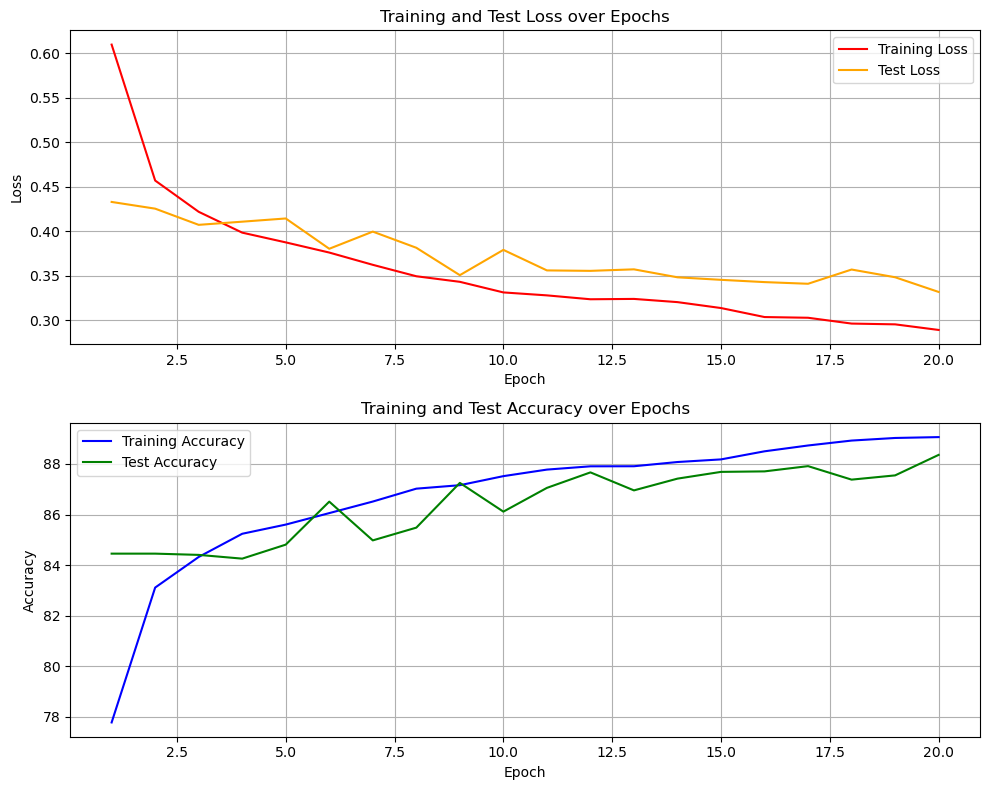

In [44]:
loss_plot(train_losses2,test_losses2,train_accuracy2,test_accuracy2,n_epochs)

### 3. Non-Linear Model with 3 hidden layers, LeakyReLU, Dropout and Batch Normalization
- Linear Layers
- Leaky ReLU Non-Linearity: Leaky ReLU is a variant of the ReLU activation function that allows a small, non-zero gradient when the unit is not active. This helps to avoid the "dying ReLU" problem (Dead Neurons since negative input becomes zero).
- Dropout
- Batch Normalization
- Optimiser: Script code can handle 3 optimisers: 'SGD' 'Adam' or 'RMSProp'

In [49]:
#Parameters
in_features = 784    #(1 x 28 x 28 images)
out_features = 10    #10 classes
n_epochs = 20
batch_size = 128
lr = 0.001
momentum = 0.5     #only for SGD
optimizer='Adam'    #Can be 'SGD' or 'Adam' or 'RMSProp'
model_type = 'ANN'

#Linear Model with 3 hidden layers
model = nn.Sequential(
    nn.Linear(in_features,512),
    nn.BatchNorm1d(512),
    nn.LeakyReLU(0.1),
    nn.Linear(512,512),
    nn.BatchNorm1d(512),
    nn.LeakyReLU(0.1),
    nn.Dropout(p=0.2),
    nn.Linear(512,512),
    nn.BatchNorm1d(512),
    nn.LeakyReLU(0.1),
    nn.Dropout(p=0.2),
    nn.Linear(512,512),
    nn.BatchNorm1d(512),
    nn.LeakyReLU(0.1),
    nn.Linear(512,out_features)
)

#Data
trainset = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)
testset = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)

# train and evaluate mlp_model
mlp_model3, train_losses3, test_losses3, train_accuracy3, test_accuracy3 = mlp_train(model, model_type, trainset, 
                                                                                     testset, n_epochs=n_epochs, 
                                                                                     batch_size=batch_size, 
                                                                                     optimizer_param=optimizer, 
                                                                                     optimizer_lr=lr, 
                                                                                     momentum=momentum)
# model: untrained model

print(mlp_model3)

Epoch 1/20, Train Loss: 0.4595, Train Accuracy: 83.2489, Test Loss: 0.4185, Test Accuracy: 84.2662
Epoch 2/20, Train Loss: 0.3569, Train Accuracy: 87.0225, Test Loss: 0.3535, Test Accuracy: 87.1835
Epoch 3/20, Train Loss: 0.3195, Train Accuracy: 88.1413, Test Loss: 0.3676, Test Accuracy: 86.6396
Epoch 4/20, Train Loss: 0.2965, Train Accuracy: 89.0553, Test Loss: 0.3929, Test Accuracy: 86.1551
Epoch 5/20, Train Loss: 0.2759, Train Accuracy: 89.7760, Test Loss: 0.3280, Test Accuracy: 88.0538
Epoch 6/20, Train Loss: 0.2604, Train Accuracy: 90.2630, Test Loss: 0.3169, Test Accuracy: 88.6274
Epoch 7/20, Train Loss: 0.2478, Train Accuracy: 90.6905, Test Loss: 0.3213, Test Accuracy: 88.4494
Epoch 8/20, Train Loss: 0.2353, Train Accuracy: 91.1342, Test Loss: 0.3385, Test Accuracy: 87.5396
Epoch 9/20, Train Loss: 0.2258, Train Accuracy: 91.4729, Test Loss: 0.3572, Test Accuracy: 87.9747
Epoch 10/20, Train Loss: 0.2149, Train Accuracy: 91.9099, Test Loss: 0.3580, Test Accuracy: 87.3022
Epoch 11/

In [40]:
best_model = mlp_model3

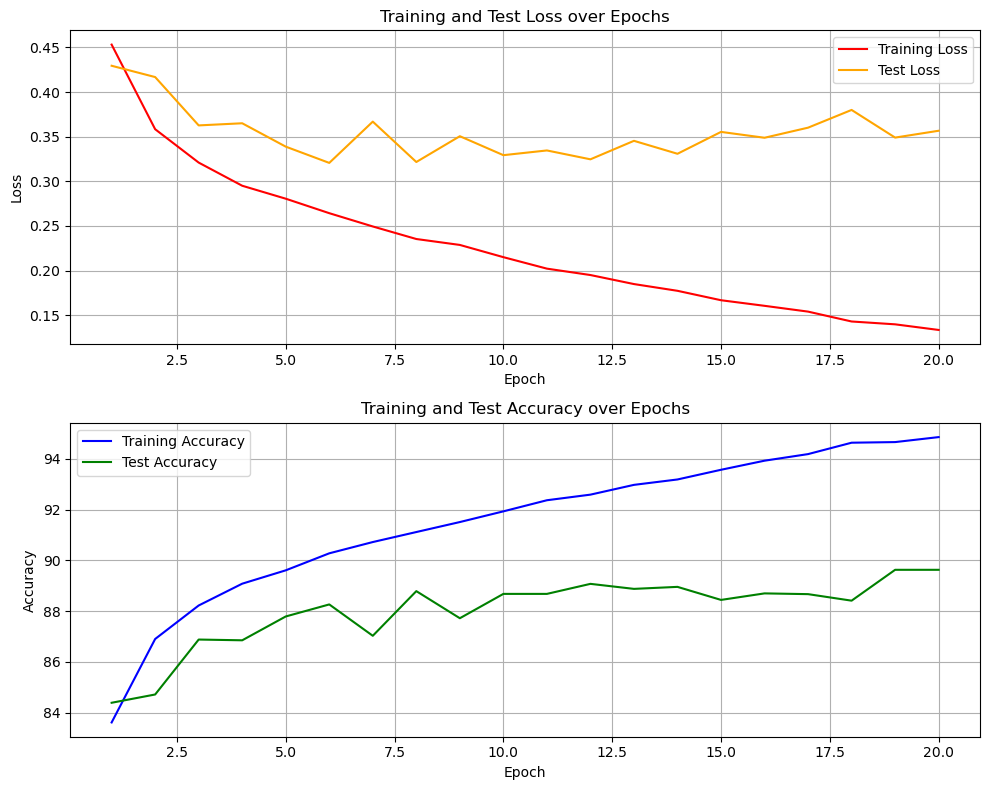

In [41]:
loss_plot(train_losses3,test_losses3,train_accuracy3,test_accuracy3,n_epochs)

### Model application

We define a simple utility function `mlp_apply` in scripts/model_pipeline.py that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

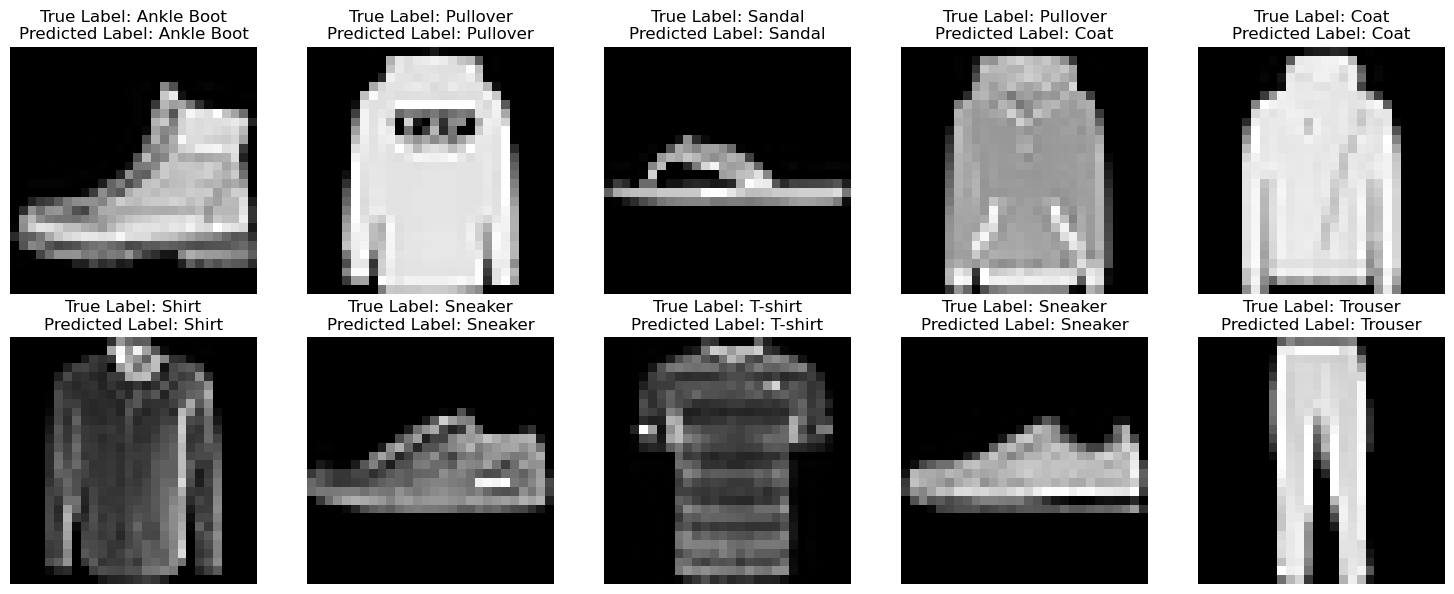

In [34]:
# define function mlp_apply so that it can be run from this cell
from scripts.model_pipeline import mlp_apply

# user parameters
test_indices = torch.randint(0, 10000, (10,))  # list of 10 indexes - examples to extract from test set
testset = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)
model_type = 'ANN'

mlp_apply(best_model, model_type, testset, test_indices)

### Comparing Models and Discussing Results 

**We compare the performance of the three models using suitable supportive tables and graphs, and complemented by relevant comments.**

### Model 1: Basic MLP with ReLU

This model reaches **85.94%** test accuracy in the 20th epoch. The ReLU activation functions add non-linearity to the model, allowing it to learn more complex patterns in the data. However, without Dropout and Batch norm the model tends to overfit, which causes the test loss to increase during the last epochs.

Hyperparameters:
- Optimizer SGD without momentum ie momentum = 0
- Learning Rate = 0.1
- epochs = 20
- Batch_size = 128


NN Architecture:
- Input: 784 features (e.g., flattened 28x28 image)
- Layers:
    - Input layer (784 -> 512)
    - Linear layer (512 -> 512)
    - ReLU activation
    - Linear layer (512 -> 100)
    - ReLU activation
    - Linear layer (100 -> 100)
    - Output layer (100 -> 10)

### Model 2: MLP with Relu and Dropout

This model reaches test accuracy of **88.36%** in the 20th epoch. The ReLU activation functions add non-linearity to the model, allowing it to learn more complex patterns in the data. The dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.

Hyperparameters:
- Optimizer SGD with Momentum=0.9 
- Learning rate=0.1
- 20 epochs
- Batch size 128

NN Architecture:
- Input: 784 features (e.g., flattened 28x28 image).
- Layers:
    - Input layer (784 -> 512)
    - ReLU activation
    - Dropout layer with Dropout porbability=0.2
    - Linear layer (512 -> 512)
    - ReLU activation
    - Dropout layer with Dropout porbability=0.2
    - Output layer (512 -> 10)

### Model 3: MLP with LeakyRelu, Dropout and BatchNorm

This model reaches **89.2%** test accuracy in the 20th epoch. This model includes batch normalization layers, ReLU activation functions, and dropout layers. Batch normalization layers help improve the training speed and stability of the neural network, while dropout layers help prevent overfitting. Also we use Leaky RELU instead of RELU activation, which allows a small, non-zero gradient when the unit is not active. Also, we switch from SGD to Adam to give better resutls.

- **Predictions**: We use this model on random test indices to check the predictions. The model gives correct predictions on 9 out of 10 test samples(visualized above).

Hyperparameters:
- Opimiser: Adam
- Learning rate: 0.001
- epochs = 20
- batch size = 128

NN Architecture:
- Input: 784 features (e.g., flattened 28x28 image).
- Layers:
    - Input layer (784 -> 512)
    - Batch Normalization (512)
    - LeakyReLU activation
    - Linear layer (512 -> 512)
    - Batch Normalization (512)
    - LeakyReLU activation
    - Dropout layer (p=0.2)
    - Linear layer (512 -> 512)
    - Batch Normalization (512)
    - LeakyReLU activation
    - Dropout layer (p=0.2)
    - Linear layer (512 -> 512)
    - Batch Normalization (512)
    - LeakyReLU activation
    - Output layer (512 -> 10)

In [18]:
n_epochs = 20
epochs = list(range(1, n_epochs+1))

### Loss Comparison:

The test loss decreases for all models with a lot of spikes. 
- The model 1 eventually starts overfitting, and gives a test loss of 0.40 in the 20th epoch. This is because we only use simple linear model with Relu non-linearity. We also use simple SGD here.
- Model 2 results in a loss of 0.33 which is the lowest test loss amongst all models. In this model, we use dropout to prevent overfitting. We use SGD with momentum, which results in loss lower than model 1.
- Model 3 results in a loss of 0.34 which is slightly higher than Model 2. This model uses Leaky relu to avoid dying Relu problem, dropout and batch normalization to reduce overfitting. We switch from SGD to Adam optimizer.

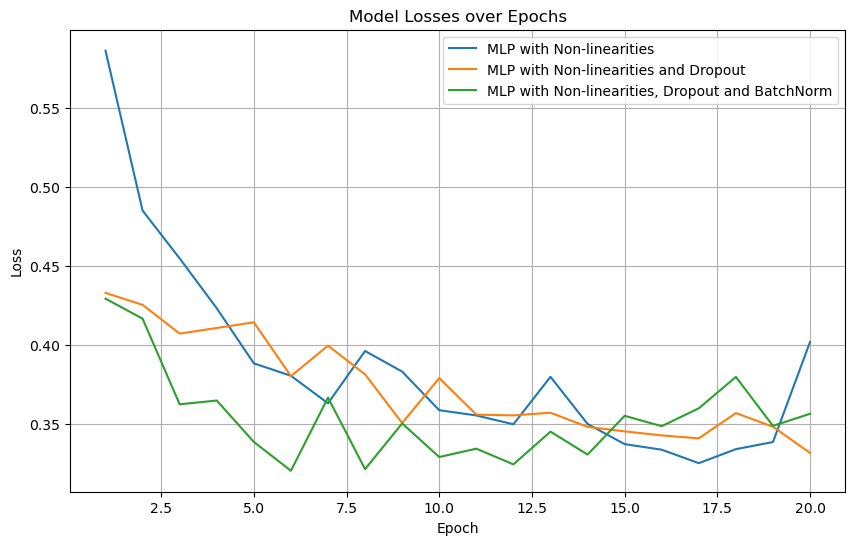

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, test_losses1, label='MLP with Non-linearities')
plt.plot(epochs, test_losses2, label='MLP with Non-linearities and Dropout')
plt.plot(epochs, test_losses3, label='MLP with Non-linearities, Dropout and BatchNorm')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Losses over Epochs')
plt.legend()
plt.grid(True)

plt.show()

### Accuracy Comparison

The highest test accuracy is of model 3.
- Model 1 has **88%** accuracy in the 19th epoch, but drops to **85.94%** in the 20th epoch, where it starts to overfit.
- Model 2 has **88.6%** test accuracy. This might be since we use SGD with momentum 0.9, and dropout layers to reduce overfitting. The accuracy of this model is similar to Model 1.
- Model 3 has **89.2%** test accuracy. We use LeakyRelu instead of Relu which avoids the dying relu problem. Here we use optimiser Adam, and Dropout as well as batch norm to reduce overfitting.

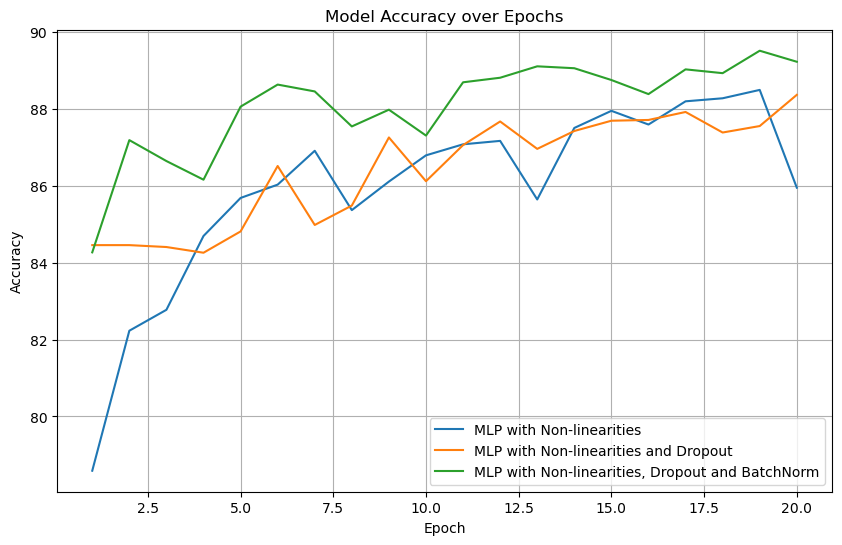

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, test_accuracy1, label='MLP with Non-linearities')
plt.plot(epochs, test_accuracy2, label='MLP with Non-linearities and Dropout')
plt.plot(epochs, test_accuracy3, label='MLP with Non-linearities, Dropout and BatchNorm')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.show()